<a href="https://colab.research.google.com/github/JacinthaJanice/DAA/blob/main/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

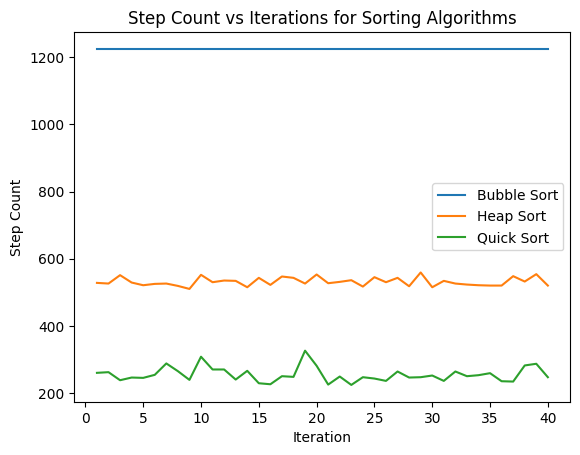

In [ ]:
import time
import random
import matplotlib.pyplot as plt

# Step-count method for Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    steps = 0
    for i in range(n):
        for j in range(0, n-i-1):
            steps += 1  # Increment step count
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return steps

# Step-count method for Heap Sort
def heapify(arr, n, i, steps):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l
        steps += 1

    if r < n and arr[r] > arr[largest]:
        largest = r
        steps += 1

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        steps = heapify(arr, n, largest, steps)

    steps += 1
    return steps

def heap_sort(arr):
    n = len(arr)
    steps = 0

    for i in range(n // 2 - 1, -1, -1):
        steps = heapify(arr, n, i, steps)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        steps = heapify(arr, i, 0, steps)

    return steps

# Step-count method for Quick Sort
def partition(arr, low, high, steps):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        steps += 1
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i + 1, steps

def quick_sort_recursive(arr, low, high, steps):
    if low < high:
        pi, steps = partition(arr, low, high, steps)
        steps = quick_sort_recursive(arr, low, pi-1, steps)
        steps = quick_sort_recursive(arr, pi+1, high, steps)
    return steps

def quick_sort(arr):
    return quick_sort_recursive(arr, 0, len(arr)-1, 0)

# Function to generate random list and calculate steps for sorting
def run_sorting_algorithms(iterations, array_size):
    bubble_steps = []
    heap_steps = []
    quick_steps = []

    for _ in range(iterations):
        arr = random.sample(range(1, 1000), array_size)
        arr_copy1 = arr[:]
        arr_copy2 = arr[:]

        bubble_steps.append(bubble_sort(arr))
        heap_steps.append(heap_sort(arr_copy1))
        quick_steps.append(quick_sort(arr_copy2))

    return bubble_steps, heap_steps, quick_steps

# Plotting the results
def plot_results(iterations, bubble_steps, heap_steps, quick_steps):
    x = list(range(1, iterations + 1))

    plt.plot(x, bubble_steps, label='Bubble Sort')
    plt.plot(x, heap_steps, label='Heap Sort')
    plt.plot(x, quick_steps, label='Quick Sort')

    plt.xlabel('Iteration')
    plt.ylabel('Step Count')
    plt.title('Step Count vs Iterations for Sorting Algorithms')
    plt.legend()
    plt.show()

# Running the sorting algorithms and plotting
iterations = 40  # Repeat 40 times
array_size = 50  # Size of the array

bubble_steps, heap_steps, quick_steps = run_sorting_algorithms(iterations, array_size)
plot_results(iterations, bubble_steps, heap_steps, quick_steps)
